In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

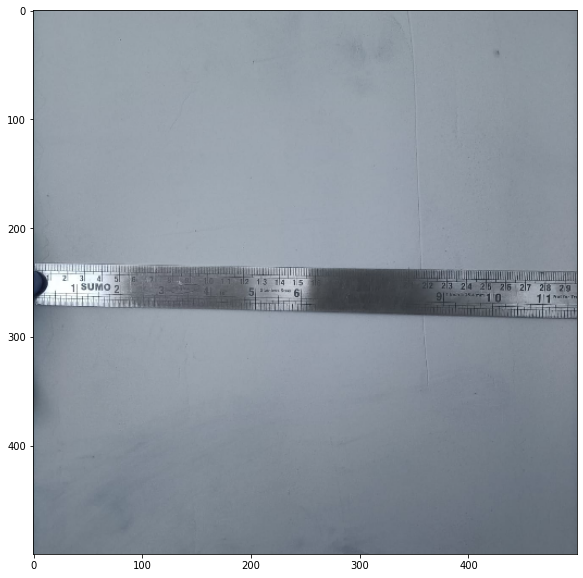

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Crack Images/7.jpg",1)
img = cv2.resize(img,(500,500))
plt.figure (figsize= (10,10))
plt.imshow(img)

**500  *pixels* = 29.6 cm = 296 mm**

distace between wall and camera = 1 feet

(640, 960)


<ipython-input-4-1700f675dbf4>:14: RuntimeWarning: overflow encountered in ubyte_scalars
  if (abs(gray[row,column]-gray[row,column+1])>225):


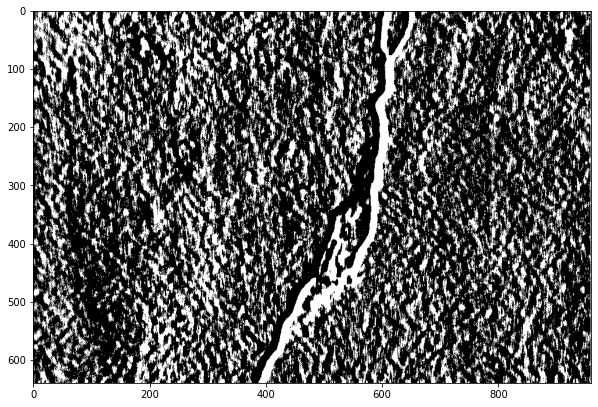

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Crack Images/Copy of crack-695010_960_720.jpg")
#cv2.imshow("Input image", img)
cv2.waitKey(0)
#print(type(img))
#print(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(11,11),5)
print(np.shape(gray))
row=[]
ivalue=[]
for row in range(0,np.shape(gray)[0]):
    for column in range(0,np.shape(gray)[1]-1):

      if (abs(gray[row,column]-gray[row,column+1])>225):
        gray[row,column]=255
      else:
        gray[row,column]=0

plt.figure (figsize= (10,10))
plt.imshow(gray,cmap='gray')

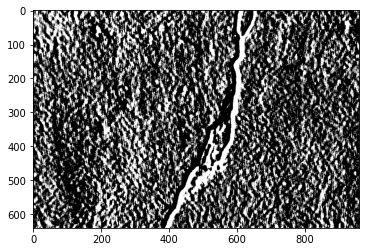

In [ ]:
kernel = np.array([ [0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]],np.uint8)

new = cv2.morphologyEx(gray, cv2.MORPH_HITMISS, kernel)

plt.imshow(new,cmap='gray')

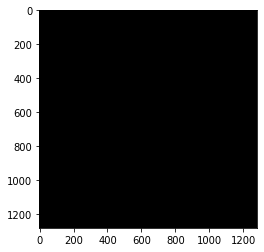

In [ ]:
#@title
contours,hierarchy = cv2.findContours(gray, 1, 2)
mask = np.ones(gray.shape[:2], dtype="uint8") *0
for n in range(0,np.shape(contours)[0]):
  cnt = contours[n]
  M = cv2.moments(cnt)
  area = cv2.contourArea(cnt)
  if(area<=150):
    #print(area)
    cv2.drawContours(gray, contours, -1, (0, 255, 0), 3)

plt.imshow(gray,cmap='gray')

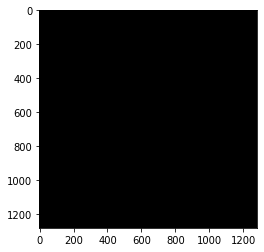

In [ ]:
im_floodfill = gray.copy()
h, w = gray.shape[:2]
mask = np.ones((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
im_floodfill_inv = cv2.bitwise_not(im_floodfill)


plt.imshow(im_floodfill,cmap='gray')


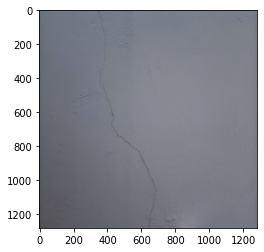

In [ ]:
plt.imshow(img,cmap='gray')

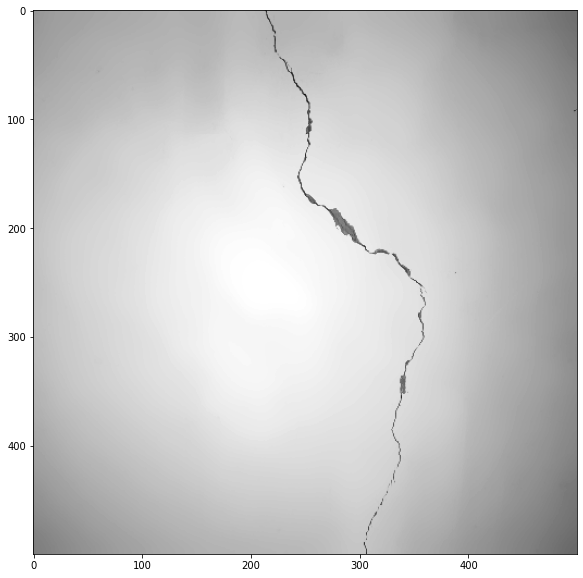

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Crack Images/8.jpg",0)
img = cv2.resize(img, (500,500))
clean = cv2.bilateralFilter(img, 51, 10, 10)
plt.figure (figsize= (10,10))
plt.imshow(clean,cmap='gray')

In [ ]:
# gray_img = cv2.cvtColor(clean,cv2.COLOR_BGR2GRAY)
# plt.figure (figsize= (10,10))
# plt.imshow(gray_img,cmap = "gray")
gray_img = clean

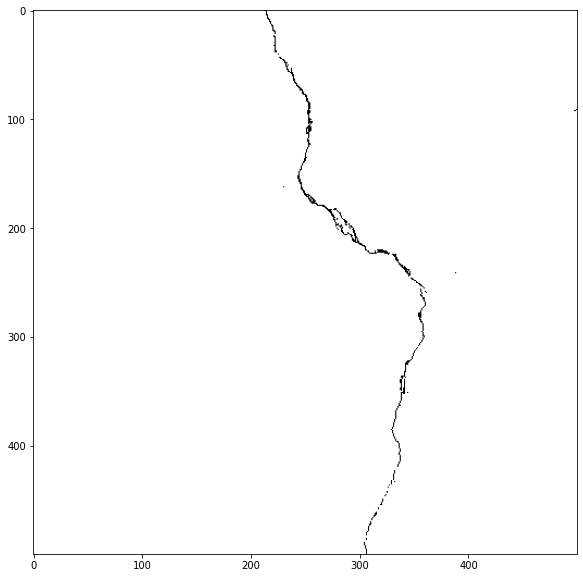

In [ ]:
bin_img = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,7,11)
plt.figure (figsize= (10,10))
plt.imshow(bin_img,cmap="gray")

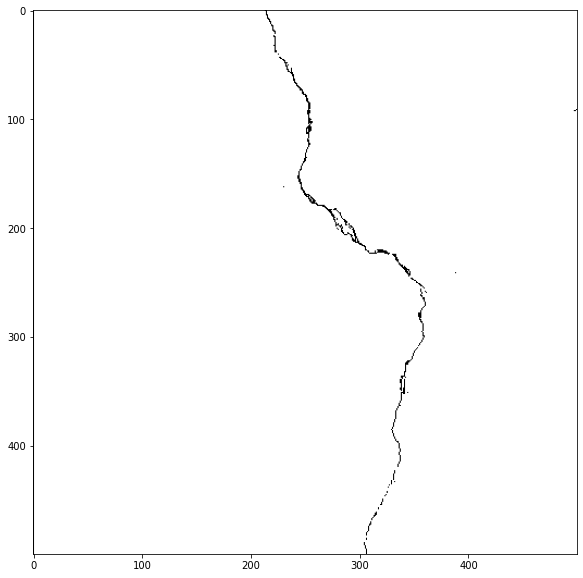

In [ ]:
for i in range(1,500):
  for j in range(0,500):
    if(i==0 or i==500 or j==0 or j==500):
      bin_img[i,j]=0

plt.figure (figsize= (10,10))
plt.imshow(bin_img,cmap="gray")

In [ ]:

# contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# mask = np.ones(gray_img.shape[:2], dtype="uint8") *0
# for n in range(0,np.shape(contours)[0]):
#   cnt = contours[n]
#   # M = cv2.moments(cnt)
#   area = cv2.contourArea(cnt)
#   # print(area)
#   if(area<=150):
#     # print(area)
#     cv2.drawContours(bin_img, contours, -1, (0, 255, 0), 3)
# plt.figure (figsize= (10,10))
# plt.imshow(bin_img,cmap="gray")

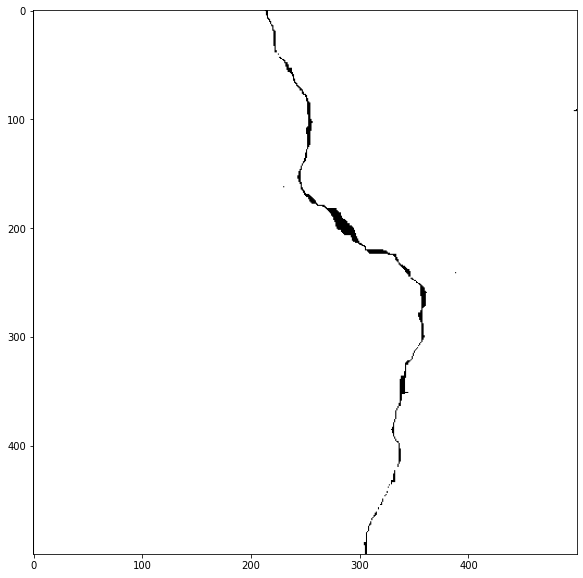

In [ ]:

kernel = np.ones((11,11), np.uint8)

opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
plt.figure (figsize= (10,10))
plt.imshow(opening,cmap="gray")

In [ ]:
def find_skeleton1(thresh):
    skeleton = np.zeros(thresh.shape,np.uint8)

    # _,thresh = cv2.threshold(img,127,255,0)

    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

    iters = 0
    while(True):
        eroded = cv2.erode(thresh, kernel)
        temp = cv2.dilate(eroded, kernel)
        temp = cv2.subtract(thresh, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        thresh = eroded.copy()

        iters += 1
        if cv2.countNonZero(thresh) == 0:
            return (skeleton,iters)



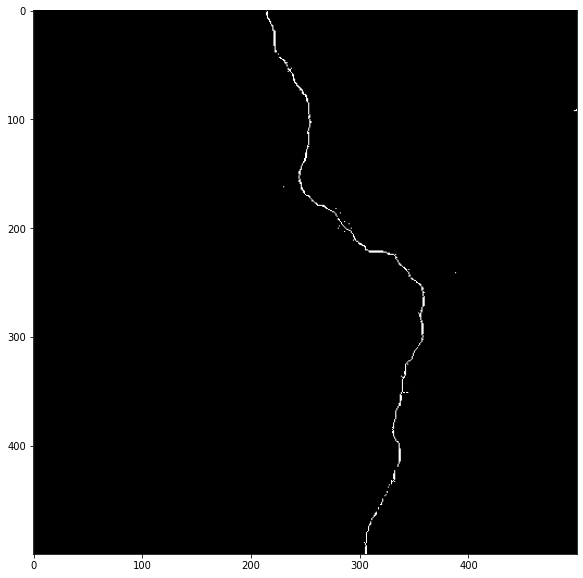

In [ ]:
skel,_= find_skeleton1(~opening)
plt.figure (figsize= (10,10))
plt.imshow(skel,cmap="gray")



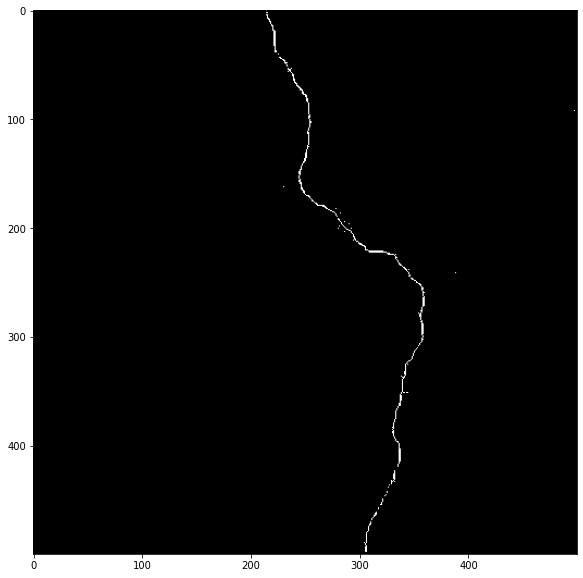

In [ ]:
for i in range(1,500):
  for j in range(0,500):
    if(i==0 or i==1 or i==3 or i==499 or i==498 or i==500 or j==0 or j==1 or j==3 or j==499 or j==498 or j==500):
      skel[i,j]=0

plt.figure (figsize= (10,10))
plt.imshow(skel,cmap="gray")

In [ ]:


contours1, hierarchy = cv2.findContours(skel, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
mask = np.ones(gray_img.shape[:2], dtype="uint8") *0
area_array = []
for n in range(0,np.shape(contours1)[0]):
  cnt = contours1[n]
  # M = cv2.moments(cnt)
  area=len(np.unique(cnt,return_index=False,return_inverse=False,return_counts=False,axis=0))
  if area>50:
    area_array = np.append(area_array, area)
print("area",area_array)



area [144.  97. 113. 211.  57.]


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
print("length:",np.sum(area_array),"pixels")
print("length:",round(np.sum(area_array)*0.592,2),"mm")

length: 622.0 pixels
length: 368.22 mm


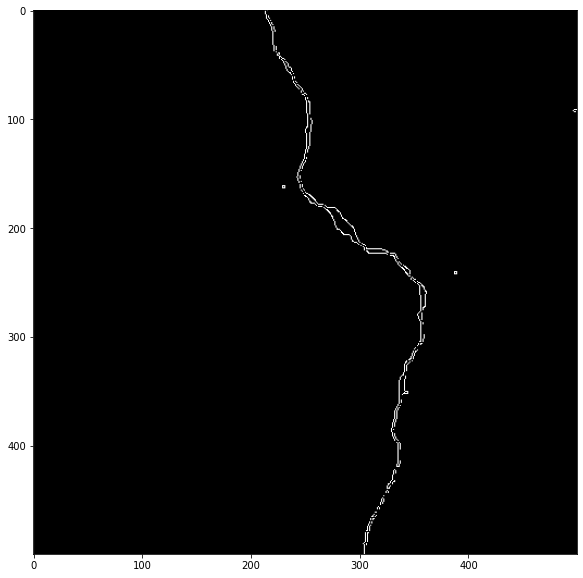

In [ ]:
edges = cv2.Canny(opening,100,200)
plt.figure (figsize= (10,10))
plt.imshow(edges,cmap="gray")

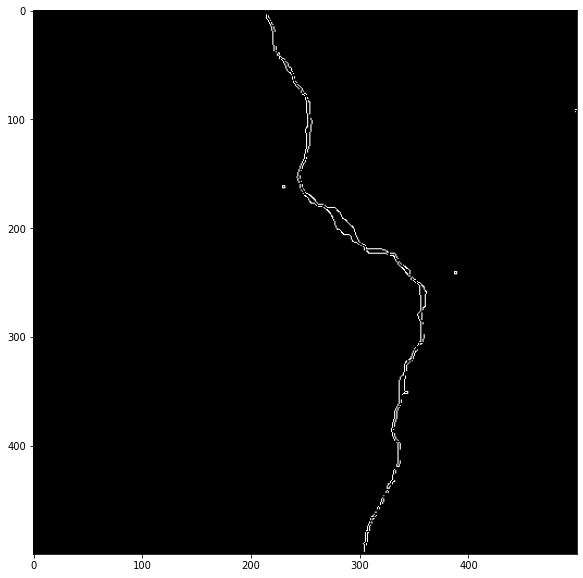

In [ ]:
for i in range(1,500):
  for j in range(0,500):
    if(i==0 or i==1 or i==2or i==3 or i==499 or i==498 or i==500 or j==0 or j==1 or j==2or j==3 or j==495 or j==497 or j==496):
      edges[i,j]=0

plt.figure (figsize= (10,10))
plt.imshow(edges,cmap="gray")

In [ ]:
# for i in range(0,500):
#   for j in range(0,1):
#      edges[i,j]

width_array=[]
for i in range(0,500):
  line = edges[i,0:500]
  x=[]
  for j in range(0,len(line)):
        if line[j]==255:
          x = np.append(x, j)
  if len(x)>1:
    crack_width = x[len(x)-1]-x[0]
    width_array = np.append(width_array,crack_width)
  else:
    width_array = np.append(width_array,1)

width_array

array([215.,   1.,   1.,   1.,   1.,   2.,   2.,   3.,   1.,   2.,   1.,
         2.,   2.,   2.,   1.,   2.,   2.,   2.,   3.,   2.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         2.,   2.,   2.,   2.,   1.,   1.,   1.,   2.,   1.,   1.,   2.,
         4.,   3.,   1.,   2.,   3.,   3.,   3.,   2.,   4.,   5.,   4.,
         4.,   4.,   1.,   3.,   1.,   1.,   2.,   2.,   1.,   1.,   2.,
         3.,   1.,   2.,   3.,   3.,   3.,   3.,   1.,   2.,   1.,   1.,
         4.,   1.,   1.,   2.,   2.,   1.,   2.,   3.,   3.,   3.,   3.,
         3.,   3.,   3., 248.,   3., 247.,   3.,   2.,   1.,   1.,   1.,
         3.,   3.,   4.,   4.,   4.,   4.,   3.,   3.,   4.,   4.,   5.,
         5.,   5.,   4.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
         3.,   3.,   3.,   3.,   2.,   2.,   2.,   2.,   2.,   2.,   1.,
         1.,   1.,   1.,   2.,   2.,   1.,   2.,   3.,   2.,   2.,   2.,
         2.,   2.,   2.,   1.,   2.,   1.,   1.,   

In [ ]:
width_array = width_array*(width_array<100)

In [ ]:
max = np.max(width_array)
min = np.min(width_array)
avg = np.sum(width_array)/len(width_array)
print(f"Minimun width:{min} \nMaximum width:{max} \nAvegare width:{avg}")

Minimun width:0.0 
Maximum width:47.0 
Avegare width:3.394


In [ ]:
width_array

array([ 0.,  1.,  1.,  1.,  1.,  2.,  2.,  3.,  1.,  2.,  1.,  2.,  2.,
        2.,  1.,  2.,  2.,  2.,  3.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  1.,  1.,
        1.,  2.,  1.,  1.,  2.,  4.,  3.,  1.,  2.,  3.,  3.,  3.,  2.,
        4.,  5.,  4.,  4.,  4.,  1.,  3.,  1.,  1.,  2.,  2.,  1.,  1.,
        2.,  3.,  1.,  2.,  3.,  3.,  3.,  3.,  1.,  2.,  1.,  1.,  4.,
        1.,  1.,  2.,  2.,  1.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        0.,  3.,  0.,  3.,  2.,  1.,  1.,  1.,  3.,  3.,  4.,  4.,  4.,
        4.,  3.,  3.,  4.,  4.,  5.,  5.,  5.,  4.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,  2.,  2.,
        2.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,  3.,  2.,  2.,  2.,
        2.,  2.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,  3.,  2.,  1.,
        1.,  2.,  1.,  1.,  2., 18., 18., 16.,  1.,  3.,  1.,  1.,  4.,
        1.,  6.,  6.,  5.,  5.,  6.,  5.,  6.,  6.,  7.,  8.,  7

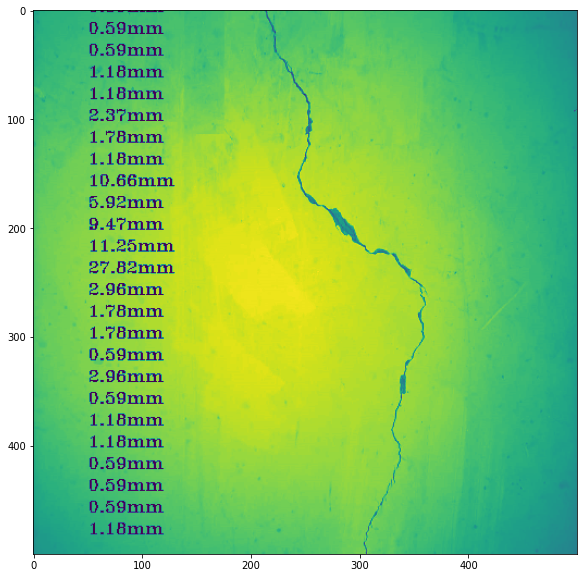

In [ ]:
final_img = img.copy()
for i in range(1,500,20):
  if width_array[i]>0:
    cv2.putText(img=final_img, text=str(round(int(width_array[i])*0.592,2))+"mm", org=(50, i), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.5, color=(0, 0, 0),thickness=1)
    # 1 pixel = 0.592 mm
plt.figure (figsize= (10,10))
plt.imshow(final_img)

In [ ]:
import math
area = 0
for i in range(0,500):
  for j in range(0,500):
    if bin_img[i,j]==0:
      area = area+1

print("Area:",round(area*0.592*0.592,2),"mm sq")

Area: 490.65 mm sq


In [ ]:

plt.figure (figsize= (10,10))
plt.imshow(out,cmap='gray')

NameError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
for i in range(1,500,20):
  if width_array[i]>0:
    cv2.putText(img=out, text=str(round(int(width_array[i])*0.592,2))+"mm", org=(50, i), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.5, color=(0, 0, 0),thickness=1)
    # 1 pixel = 0.592 mm
plt.figure (figsize= (10,10))
plt.imshow(out,cmap = 'gray')

NameError: ignored

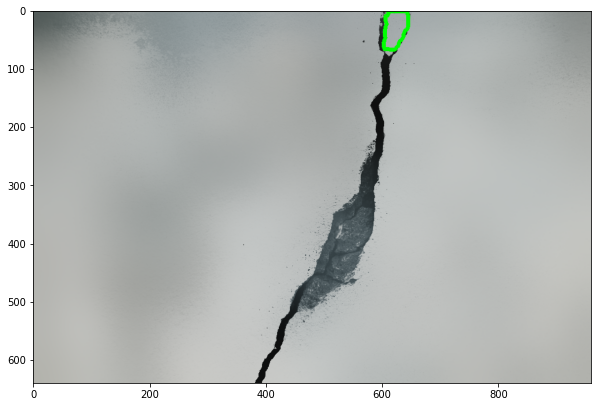

In [ ]:
import cv2 as cv
import numpy as np


final_img =cv2.imread("/content/drive/MyDrive/Crack Images/Copy of 3.jpg",1)
final_img = cv2.bilateralFilter(final_img,101, 100, 100)
final_img = cv2.bilateralFilter(final_img,101, 100, 100)

gray = cv.cvtColor(~final_img, cv.COLOR_BGR2GRAY)
ret, binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

se = cv.getStructuringElement(cv.MORPH_RECT, (10, 10), (-1, -1))
binary = cv.morphologyEx(binary, cv.MORPH_OPEN, se)
# cv.imshow("binary", binary)

contours,hierachy=cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
height, width = final_img.shape[:2]
for c in range(len(contours)):
    x, y, w, h = cv.boundingRect(contours[c])
    area = cv.contourArea(contours[c])
    if h > (height//2):
        continue
    if area < 10:
        continue
    # cv.rectangle(final_img, (x, y), (x+w, y+h), (0, 0, 255), 1, 8, 0)
    cv.drawContours(final_img, contours, c, (0, 255, 0), 5, 8)

# cv.imshow("result", final_img)
# cv.imwrite("result.jpg", final_img)

# cv.waitKey(0)
# cv.destroyAllWindows()
plt.figure (figsize= (10,10))
plt.imshow(final_img)